In [3]:
#dependencies 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import os
import random

from scipy.stats import linregress

#Unzip Kaggle Data
import zipfile

file_to_load = 'wine-reviews/winemag-data-130k-v2.csv'



In [4]:
df = pd.read_csv(file_to_load)
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.drop(['taster_twitter_handle'], axis=1, inplace=True)
df.drop(['taster_name'], axis=1, inplace=True)
df.drop(['region_1'], axis=1, inplace=True)
df.drop(['region_2'], axis=1, inplace=True)
df.head()

,country,description,designation,points,price,province,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [5]:
number_country = len(df["country"].unique())
number_country

44

In [6]:
number_countryvariety = len(df["variety"].unique())
number_countryvariety



708

In [9]:
item = df[["country", "variety"]]
item_group = item.groupby(["country", "variety"])
item_count = item_group["variety"].count()

item_table = pd.DataFrame({"total count": item_count})
item_sort = item_table.sort_values(by = "total count", ascending = False)[:10]

item_sort

total count
country variety                              
US      Pinot Noir                       9885
        Cabernet Sauvignon               7315
        Chardonnay                       6801
France  Bordeaux-style Red Blend         4725
Italy   Red Blend                        3624
US      Syrah                            3244
        Red Blend                        2972
France  Chardonnay                       2808
Italy   Nebbiolo                         2736
US      Zinfandel                        2711

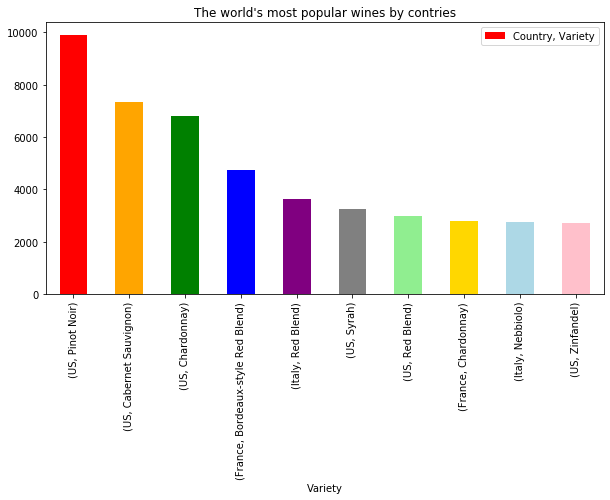

In [8]:
item = df[["country", "variety"]]
item_group = item.groupby(["country", "variety"])
item_count = item_group["variety"].count()
item_table = pd.DataFrame({"Country, Variety": item_count})
item_sort = item_table.sort_values(by = "Country, Variety", ascending = False)[:10]

colors = [['red', 'orange', 'green', 'blue', 'purple', 'grey', 'lightgreen', 'gold', 'lightblue', 'pink']]

item_sort.plot(kind = "bar", color = colors, figsize = (10,5))

plt.title("The world's most popular wines by contries")
plt.xlabel("Variety")
plt.ylabel("")
plt.savefig("world_popular_variety_con")



In [10]:
item_count = df.groupby(["variety"]).count()["country"].sort_values(ascending = False)[:10]
item_count_df = pd.DataFrame(item_count)
item_count_df


,country
variety,
Pinot Noir,13269
Chardonnay,11750
Cabernet Sauvignon,9470
Red Blend,8935
Bordeaux-style Red Blend,6915
Riesling,5188
Sauvignon Blanc,4963
Syrah,4142
Rosé,3563


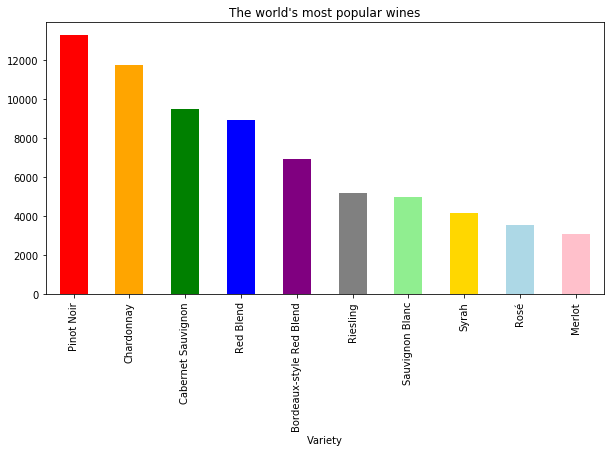

In [128]:
item_count = df.groupby(["variety"]).count()["country"].sort_values(ascending = False)[:10]

wine_name = ['Pinot Noir', 'Chardonnay','Cabernet Sauvignon', 'Red Blend', 'Bordeaux-style Red Blend', 'Riesling', 'Sauvignon Blanc', 'Syrah', 'Rose', 'Merlot']

item_count.plot(kind="bar", color=['red', 'orange', 'green', 'blue', 'purple', 'grey', 'lightgreen', 'gold', 'lightblue', 'pink'], figsize=(10,5))

plt.title("The world's most popular wines")
plt.xlabel("Variety")
plt.ylabel("")
plt.savefig("world_popular_variety")

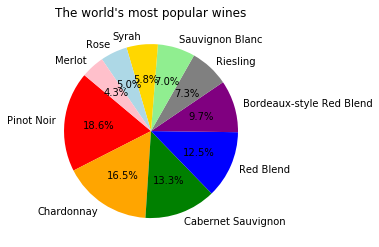

In [11]:
item_count = df.groupby(["variety"]).count()["country"].sort_values(ascending = False)[:10]

color=['red', 'orange', 'green', 'blue', 'purple', 'grey', 'lightgreen', 'gold', 'lightblue', 'pink']

wine_name = ['Pinot Noir', 'Chardonnay','Cabernet Sauvignon', 'Red Blend', 'Bordeaux-style Red Blend', 'Riesling', 'Sauvignon Blanc', 'Syrah', 'Rose', 'Merlot']

plt.pie(item_count, labels=wine_name,colors = color, startangle=140, autopct="%1.1f%%")

plt.title("The world's most popular wines")
plt.savefig("world_popular_variety_pie")
plt.show()